In [1]:
import sys
import os
from time import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from scipy.stats import norm 

In [2]:
# Some Basic Parameters for housekeeping

# set location of input files:
inpDir = os.path.join('..', 'input')

# set location of inputs for this module
moduleDir = 'machine_learning'

# set location of output files
outDir = os.path.join('..', 'output')

In [13]:
iris_file= os.path.join(inpDir, moduleDir, 'iris.csv')
iris_features=['sepal length',
               'sepal width ',
               'petal length',
               'petal width',
               'target']
iris_df=pd.read_csv(iris_file,sep=',',skiprows=1,header=None,names=iris_features)
iris_df.head()


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


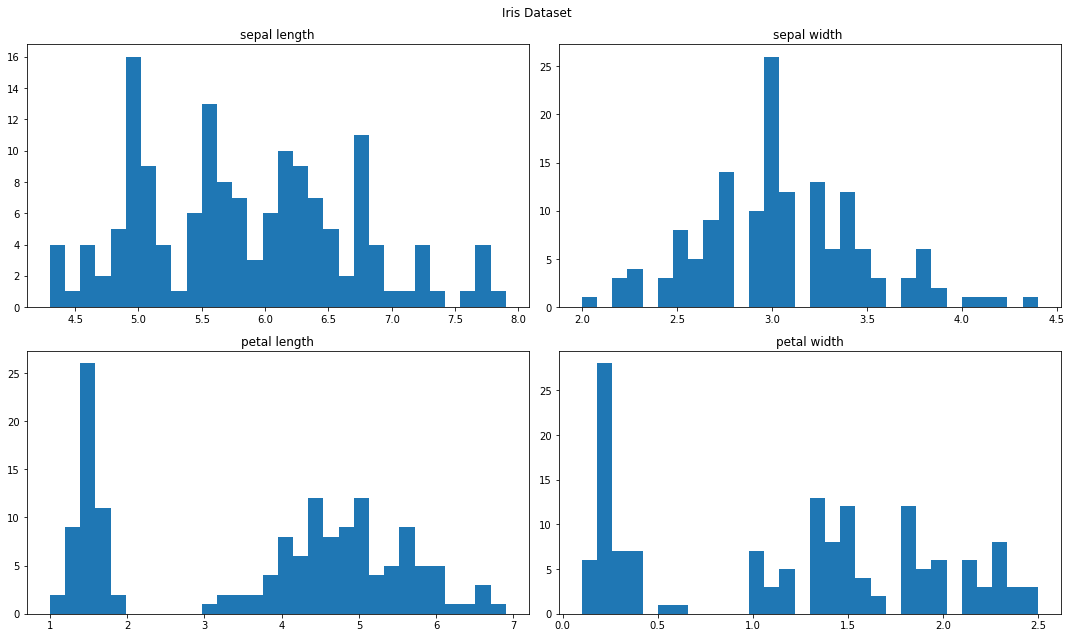

In [11]:
fig=plt.figure(figsize=(15,9))
fig.suptitle('Iris Dataset')

for count,col in enumerate(iris_df.columns[:-1]):
    ax=fig.add_subplot(2,2,count+1)
    plt.subplots_adjust(wspace=0.1,hspace=0.1)
    n,bins,patches=ax.hist(iris_df[col],30)
    ax.set_title('{}'.format(iris_df.columns[count]))
    ax.axis('tight')
plt.tight_layout()
plt.show()

In [ ]:
features_df= iris_df.drop('target',axis=1)
labels_df=iris_df[['target']]
features_df.head()

In [ ]:
labels_df.head()

In [ ]:
##Function to calculate mean , standerd deviation 

def fn_calc_mu_std(df):
    
    
    mu={}
    std_dev={}
    min_val={}
    max_val={}
    
    for col in df.columns:
        mu[col]=df[col].mean()
        std_dev[col]=df[col].std()
        min_val[col]=df[col].min()
        max_val[col]=df[col].max()
        
    return mu,std_dev,min_val,max_val

In [ ]:
target_names=['setosa','versicolor','virginica']
formatter=plt.FuncFormatter(lambda i,*args: target_names[int(i)])

props=dict(boxstyle='round',facecolor='aqua',alpha=0.5)

In [ ]:
pdf_label={}

for lbl in iris_df['target'].unique():
    label=target_names[lbl]
    tmp_df=iris_df[iris_df['target']==lbl]
    tmp_df=tmp_df.drop('target',axis=1)
    mu, std_dev,min_val,max_val=fn_calc_mu_std(tmp_df)
    
    fig, axes =plt.subplots(2,2,figsize=(15,9))
    fig.suptitle(f'{label.title()}(class={lbl:2d})',fontsize=16)
    nSample=1000
    pdf_col={}
    
    for count,col in enumerate(tmp_df.columns):
        ax=axes.ravel()[count]
        meanVal=mu[col]
        stdDev=std_dev[col]
        minVal=min_val[col]
        maxVal=max_val[col]
        data= np.random.normal(meanVal,stdDev,nSample)
        
        ax.hist(data,bins=50,density=True,alpha=0.5,color='b',edgecolor='k')
        x=np.linspace(data.min()-0.1,data.max()+0.1,nSample)
        pdf=norm.pdf(x,meanVal,stdDev)
        ax.plot(x,pdf,'r-',lw=2)
        
        val=features_df.iloc[-1][col]
        pdf_val=norm.pdf(val,meanVal,stdDev) 
        pdf_col[col]=pdf_val
        
        ax.axvline(x=val,color='g',linestyle='-.',linewidth=2)
        ax.axhline(y=pdf_val,color='g',linestyle='-.',linewidth=2)
        
        fmStr= "For:\n Mu : {:7.4f}\n  Std  : {:7.4f}\n Value:{:5.2f}\n  PDF :{:7.4f}"
        txtStr=fmStr.format(meanVal, stdDev, val, pdf_val)
        
        ax.text(0.8,0.95,txtStr,transform=ax.transAxes,fontsize=10,verticalalignment='top',bbox=props)
        
        ax.set_title(col.title())
        ax.set_xlabel(f"Value (for {val}, pdf={pdf_val:.4f})")
        ax.set_ylabel("Likelihood")  
        
    pdf_label[label]=pdf_col
    plt.tight_layout()
    plt.savefig(os.path.join(outDir,f'gaussian_iris_{label}.png'))
    plt.show()   